In [1]:
from pathlib import Path
root = Path("c:/deldir/perfect_physics")

In [18]:
m0 = 1
m1 = 1
m2 = 2
v0_b = 1
v1_b = 0
v2_b = -1

In [24]:
e_b = 0.5 * (m0 * v0_b**2 + m1 * v1_b**2 + m2 * v2_b**2)
e_b

1.5

In [25]:
p_b = m0 * v0_b + m1 * v1_b + m2 * v2_b
p_b

-1

In [26]:
from perfect_physics import World, Circle, Wall
for rng in [0,1]:
    c0 = Circle(x=-1, y=0, vx=v0_b, vy=0, m=m0, r=1)
    c1 = Circle(x=3, y=0, vx=v1_b, vy=0, m=m1, r=1)
    c2 = Circle(x=7, y=0, vx=v2_b, vy=0, m=m2, r=1)
    w = World([c0, c1, c2],rng=rng,xlim=(-4,14),ylim=(-2,2))
    w.run_in_place(4,show=False)
    # w.show()
    print(f"{(c0.vx,c1.vx,c2.vx)=}")
    e_a = 0.5 * (c0.m * c0.vx**2 + c1.m * c1.vx**2 + c2.m * c2.vx**2)
    p_a = c0.m * c0.vx + c1.m * c1.vx + c2.m * c2.vx
    print(f"{(e_a,p_a)=}")
    pass

Multiple collisions: 2
(c0.vx,c1.vx,c2.vx)=(-5/3, 0, 1/3)
(e_a,p_a)=(1.50000000000000, -1)
Multiple collisions: 2
(c0.vx,c1.vx,c2.vx)=(-4/3, -7/9, 5/9)
(e_a,p_a)=(1.50000000000000, -1)


In [28]:
v0_a = (-5/3)+(-4/3)/2
v0_a

-2.3333333333333335

In [30]:
e_12_a = e_b-( 0.5 * (m0 * v0_a**2))
e_12_a

-1.2222222222222228

In [31]:
p_12_a = p_b - (m0 * v0_a)
p_12_a

1.3333333333333335

In [32]:
from sympy import symbols, Eq
a_m, b_m, c_m, a_vx, b_vx, c_vx, ahat_vx, bhat_vx, chat_vx = symbols("a_m, b_m, c_m, a_vx, b_vx, c_vx, ahat_vx, bhat_vx, chat_vx")
energy_before = a_m * a_vx**2 / 2 + b_m * b_vx**2 / 2 + c_m * c_vx**2 / 2
energy_after = a_m * ahat_vx**2 / 2 + b_m * bhat_vx**2 / 2 + c_m * chat_vx**2 / 2
eq1 = Eq(energy_before, energy_after)
eq1


Eq(a_m*a_vx**2/2 + b_m*b_vx**2/2 + c_m*c_vx**2/2, a_m*ahat_vx**2/2 + b_m*bhat_vx**2/2 + c_m*chat_vx**2/2)

In [33]:
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq2

Eq(a_m*a_vx + b_m*b_vx + c_m*c_vx, a_m*ahat_vx + b_m*bhat_vx + c_m*chat_vx)

In [36]:
from sympy import nonlinsolve
from perfect_physics import save
ccc_velocity_solutions = nonlinsolve([eq1, eq2], bhat_vx, chat_vx)
save(ccc_velocity_solutions, "ccc_velocity_solution.sympy")
ccc_velocity_solutions


{((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx - c_m*((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx)/(b_m + c_m) - sqrt(-b_m*c_m*(a_m**2*a_vx**2 - 2*a_m**2*a_vx*ahat_vx + a_m**2*ahat_vx**2 - a_m*a_vx**2*b_m - a_m*a_vx**2*c_m + 2*a_m*a_vx*b_m*b_vx + 2*a_m*a_vx*c_m*c_vx + a_m*ahat_vx**2*b_m + a_m*ahat_vx**2*c_m - 2*a_m*ahat_vx*b_m*b_vx - 2*a_m*ahat_vx*c_m*c_vx - b_m*b_vx**2*c_m + 2*b_m*b_vx*c_m*c_vx - b_m*c_m*c_vx**2))/(c_m*(b_m + c_m))))/b_m, (a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx)/(b_m + c_m) - sqrt(-b_m*c_m*(a_m**2*a_vx**2 - 2*a_m**2*a_vx*ahat_vx + a_m**2*ahat_vx**2 - a_m*a_vx**2*b_m - a_m*a_vx**2*c_m + 2*a_m*a_vx*b_m*b_vx + 2*a_m*a_vx*c_m*c_vx + a_m*ahat_vx**2*b_m + a_m*ahat_vx**2*c_m - 2*a_m*ahat_vx*b_m*b_vx - 2*a_m*ahat_vx*c_m*c_vx - b_m*b_vx**2*c_m + 2*b_m*b_vx*c_m*c_vx - b_m*c_m*c_vx**2))/(c_m*(b_m + c_m))), ((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx - c_m*((a_m*a_vx - a_m*ahat_vx + b_m*b_vx + c_m*c_vx)/(b_m + c_m) + sqrt(-b_m*c_m*(a_m**2*a_vx**2 - 2*a_m**2*a_vx*ahat_

In [35]:
len(ccc_velocity_solutions)

2

In [55]:
from sympy import Rational
def fit(ahat_vx):
    return list(ccc_velocity_solutions)[0].subs({"a_m":m0,"b_m":m1,"c_m":m2,"a_vx":v0_b,"b_vx":v1_b,"c_vx":v2_b,"ahat_vx":ahat_vx})
fit(Rational(-5,3))

0

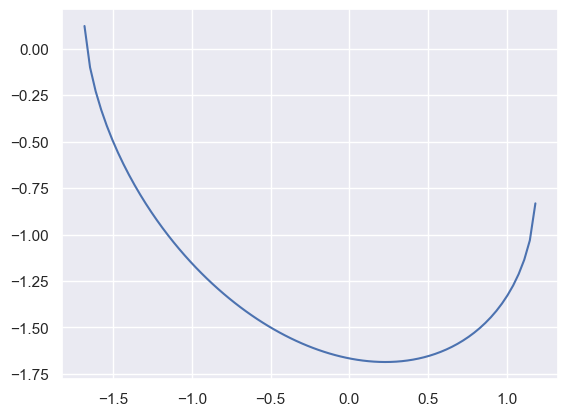

In [90]:
import matplotlib.pyplot as plt
import numpy as np
ahat_vx_list = np.linspace(-2,1.5,100)
bhat_vx_list = [fit(av)[0] for av in ahat_vx_list]
# filter out complex numbers
bhat_vx_list = np.array([(b if b.is_real else np.nan) for b in bhat_vx_list])
ahat_vx_list = np.array([(ahat_vx_list[i] if bhat_vx_list[i]==bhat_vx_list[i] else np.nan) for i in range(len(ahat_vx_list))])
plt.plot(ahat_vx_list, bhat_vx_list)

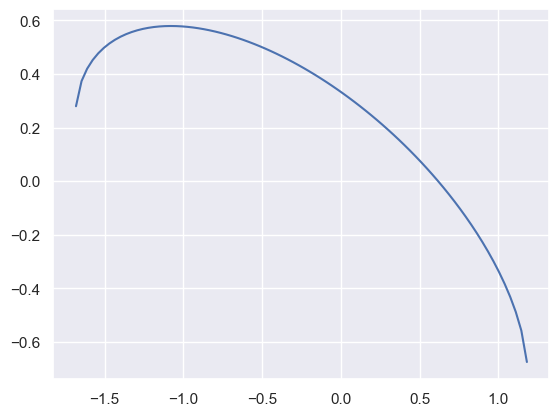

In [91]:
chat_vx_list = [fit(av)[1] for av in ahat_vx_list]
chat_vx_list = np.array([(c if c.is_real else np.nan) for c in chat_vx_list])
plt.plot(ahat_vx_list, chat_vx_list)

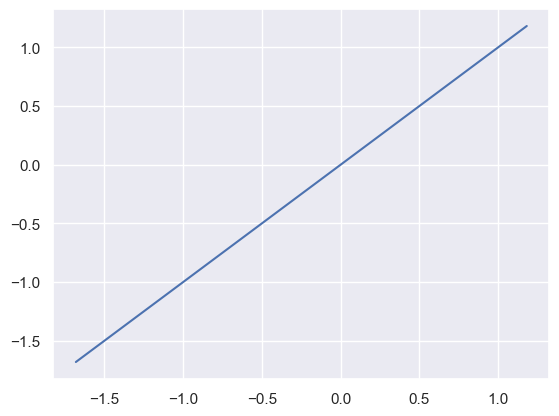

In [92]:
plt.plot(ahat_vx_list, ahat_vx_list)

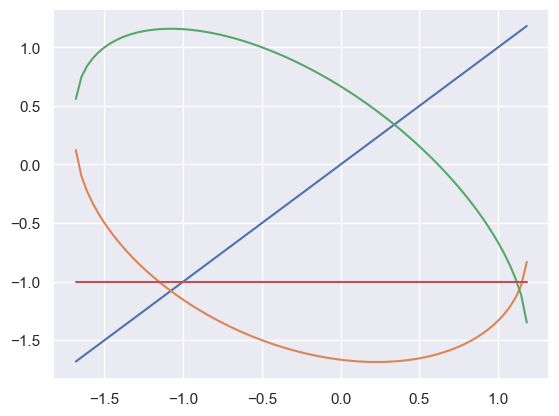

In [97]:
p_list = ahat_vx_list + bhat_vx_list + 2*np.array(chat_vx_list)
plt.plot(ahat_vx_list, ahat_vx_list,
ahat_vx_list, bhat_vx_list,
ahat_vx_list, 2*np.array(chat_vx_list),
ahat_vx_list, p_list)
# plt.axvline(x=-5/3)
# plt.axvline(x=-4/3)

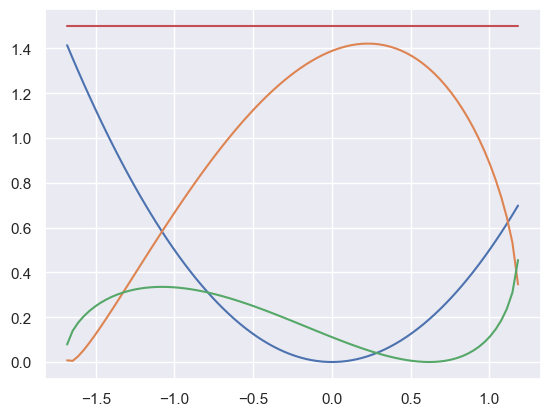

In [94]:
e_list = (ahat_vx_list**2 + np.array(bhat_vx_list)**2 + 2*np.array(chat_vx_list)**2)/2
plt.plot(ahat_vx_list, ahat_vx_list**2/2,
ahat_vx_list, np.array(bhat_vx_list)**2/2,
ahat_vx_list, 2*np.array(chat_vx_list)**2/2,
ahat_vx_list, e_list)